In [11]:
from tensorflow import keras
print('keras: ', keras.__version__)
!nvidia-smi

keras:  2.12.0
Fri Jun  9 04:37:44 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0    31W /  70W |   5099MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                         

In [12]:
# Import the Required Packages
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

# for pre-trained models
from tensorflow.keras.applications import VGG16

## Step 1: Data Loading

In [ ]:
import os
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/"

base_dir = "/content/drive/My Drive/NP DL/ASG1/food"

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

## Step 2:  Develop the Image Classification Models

### Model #1 - Training a Convnet From Scratch

### Model #1A - Baseline (Small Network's Size)

In [14]:
# Build the Model

# image size
img_size = 150

model_1A = models.Sequential()
# feature extraction layers
model_1A.add(layers.Conv2D(8, (3, 3), activation='relu',
                           input_shape=(img_size, img_size, 3)))
model_1A.add(layers.MaxPooling2D((2, 2)))
model_1A.add(layers.Conv2D(8, (3, 3), activation='relu'))
model_1A.add(layers.MaxPooling2D((2, 2)))
# classifier layers
model_1A.add(layers.Flatten())
model_1A.add(layers.Dense(4, activation='relu'))
model_1A.add(layers.Dense(10, activation='softmax'))

In [ ]:
model_1A.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 148, 148, 8)       224       
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 74, 74, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 72, 72, 8)         584       
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 36, 36, 8)        0         
 g2D)                                                            
                                                                 
 flatten_26 (Flatten)        (None, 10368)             0         
                                                                 
 dense_54 (Dense)            (None, 4)               

In [15]:
# data preprocessing

# rescale pixel values (0 and 255) to [0, 1] interval
train_datagen = ImageDataGenerator(rescale=1./255)  # floating point
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # path to target directory
        train_dir,
        # images target size
        target_size=(img_size, img_size),
        batch_size=75,
        # type of label arrays
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=40,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [ ]:
# compile the model
model_1A.compile(optimizer=optimizers.RMSprop(learning_rate=1e-3),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
# Train the Model

# fit the model
history_1A = model_1A.fit(train_generator,
                          steps_per_epoch=100,  #train_sample_size/data_batch_size
                          epochs=30,
                          validation_data=validation_generator,
                          validation_steps=50)  #validation_sample_size/data_batch_size

Epoch 1/30
100/100 [==============================] - 58s 569ms/step - loss: 2.2725 - accuracy: 0.1408 - val_loss: 2.2536 - val_accuracy: 0.1460
Epoch 2/30
100/100 [==============================] - 56s 564ms/step - loss: 2.2126 - accuracy: 0.1708 - val_loss: 2.2104 - val_accuracy: 0.1635
Epoch 3/30
100/100 [==============================] - 70s 697ms/step - loss: 2.1700 - accuracy: 0.2013 - val_loss: 2.2485 - val_accuracy: 0.1775
Epoch 4/30
100/100 [==============================] - 58s 578ms/step - loss: 2.1225 - accuracy: 0.2251 - val_loss: 2.1632 - val_accuracy: 0.2085
Epoch 5/30
100/100 [==============================] - 57s 576ms/step - loss: 2.0731 - accuracy: 0.2424 - val_loss: 2.1850 - val_accuracy: 0.1890
Epoch 6/30
100/100 [==============================] - 56s 559ms/step - loss: 2.0419 - accuracy: 0.2464 - val_loss: 2.1883 - val_accuracy: 0.2175
Epoch 7/30
100/100 [==============================] - 57s 570ms/step - loss: 2.0036 - accuracy: 0.2469 - val_loss: 2.1302 - val_ac

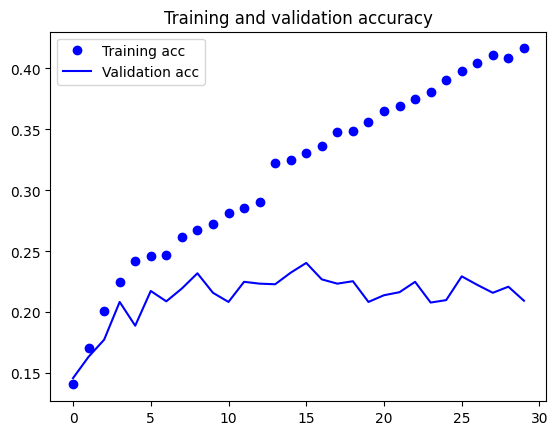

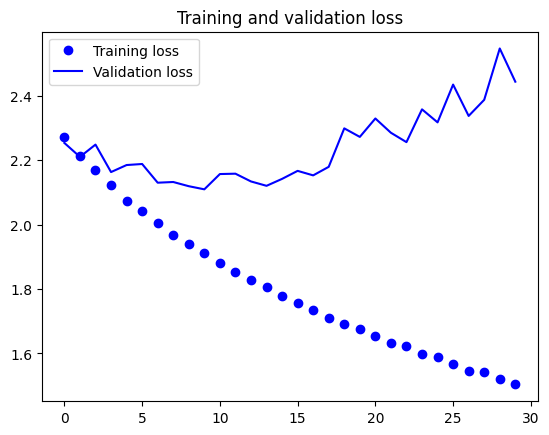

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc_1A = history_1A.history['accuracy']
val_acc_1A = history_1A.history['val_accuracy']
loss_1A = history_1A.history['loss']
val_loss_1A = history_1A.history['val_loss']

epochs_1A = range(len(acc_1A))

plt.plot(epochs_1A, acc_1A, 'bo', label='Training acc')
plt.plot(epochs_1A, val_acc_1A, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_1A, loss_1A, 'bo', label='Training loss')
plt.plot(epochs_1A, val_loss_1A, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model_1A.save('/content/drive/My Drive/NP DL/ASG1/food_model_1A.h5')

# from google.colab import files
# files.download('food_model_1A.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Model #1B - Increased Network's Size (Layers, # of Filters and # of Nodes)

In [ ]:
# Build the Model

# image size
# img_size = 150

model_1B = models.Sequential()
# feature extraction layers
model_1B.add(layers.Conv2D(32, (3, 3), activation='relu',  # changed no. of filters from 8 to 32
                           input_shape=(img_size, img_size, 3)))
model_1B.add(layers.MaxPooling2D((2, 2)))
model_1B.add(layers.Conv2D(64, (3, 3), activation='relu'))  # changed no. of filters from 8 to 64
model_1B.add(layers.MaxPooling2D((2, 2)))
model_1B.add(layers.Conv2D(128, (3, 3), activation='relu'))  # added layer
model_1B.add(layers.MaxPooling2D((2, 2)))
model_1B.add(layers.Conv2D(128, (3, 3), activation='relu'))  # added layer
model_1B.add(layers.MaxPooling2D((2, 2)))
# classifier layers
model_1B.add(layers.Flatten())
model_1B.add(layers.Dense(256, activation='relu'))  # changed no. of nodes from 4 to 256
model_1B.add(layers.Dense(10, activation='softmax'))

In [ ]:
model_1B.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
# compile the model
model_1B.compile(optimizer=optimizers.RMSprop(learning_rate=1e-3),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
# data preprocessing

# rescale pixel values (0 and 255) to [0, 1] interval
train_datagen = ImageDataGenerator(rescale=1./255)  # floating point
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # path to target directory
        train_dir,
        # images target size
        target_size=(img_size, img_size),
        batch_size=75,
        # type of label arrays
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=40,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [ ]:
# Train the Model

# fit the model
history_1B = model_1B.fit(train_generator,
                          steps_per_epoch=100,  #train_sample_size/data_batch_size
                          epochs=30,
                          validation_data=validation_generator,
                          validation_steps=50)  #validation_sample_size/data_batch_size

Epoch 1/30
100/100 [==============================] - 2278s 23s/step - loss: 2.1938 - accuracy: 0.1907 - val_loss: 2.0946 - val_accuracy: 0.2465
Epoch 2/30
100/100 [==============================] - 60s 598ms/step - loss: 1.9228 - accuracy: 0.3231 - val_loss: 1.8518 - val_accuracy: 0.3600
Epoch 3/30
100/100 [==============================] - 60s 600ms/step - loss: 1.7664 - accuracy: 0.3887 - val_loss: 1.7784 - val_accuracy: 0.3970
Epoch 4/30
100/100 [==============================] - 69s 693ms/step - loss: 1.6015 - accuracy: 0.4491 - val_loss: 1.7590 - val_accuracy: 0.4005
Epoch 5/30
100/100 [==============================] - 60s 600ms/step - loss: 1.4565 - accuracy: 0.5043 - val_loss: 1.6718 - val_accuracy: 0.4400
Epoch 6/30
100/100 [==============================] - 69s 689ms/step - loss: 1.2826 - accuracy: 0.5623 - val_loss: 1.7561 - val_accuracy: 0.4420
Epoch 7/30
100/100 [==============================] - 69s 690ms/step - loss: 1.1065 - accuracy: 0.6211 - val_loss: 1.6041 - val_ac

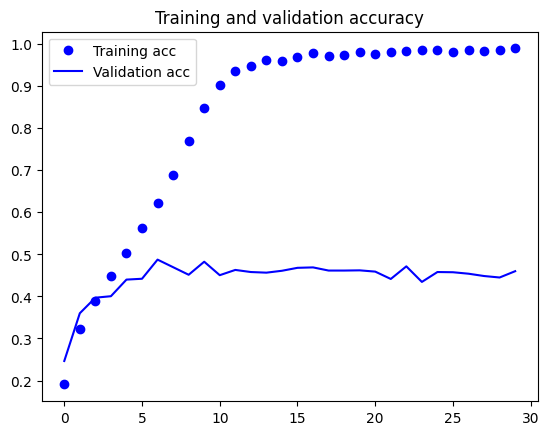

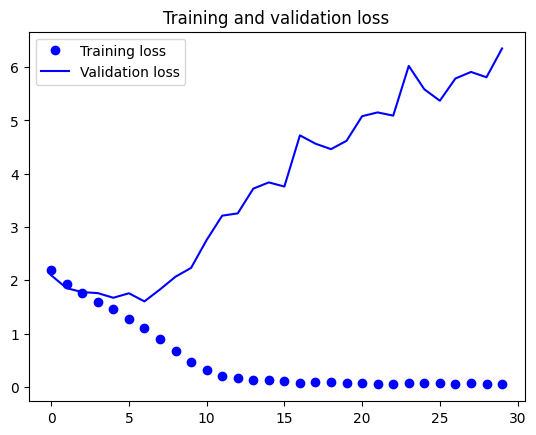

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc_1B = history_1B.history['accuracy']
val_acc_1B = history_1B.history['val_accuracy']
loss_1B = history_1B.history['loss']
val_loss_1B = history_1B.history['val_loss']

epochs_1B = range(len(acc_1B))

plt.plot(epochs_1B, acc_1B, 'bo', label='Training acc')
plt.plot(epochs_1B, val_acc_1B, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_1B, loss_1B, 'bo', label='Training loss')
plt.plot(epochs_1B, val_loss_1B, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model_1B.save('/content/drive/My Drive/NP DL/ASG1/food_model_1B.h5')

# from google.colab import files
# files.download('food_model_1B.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Model #1C - with L2 Weight Regularization

In [ ]:
# Build the Model

# image size
# img_size = 150

model_1C = models.Sequential()
# feature extraction layers
model_1C.add(layers.Conv2D(32, (3, 3), activation='relu',
                           input_shape=(img_size, img_size, 3)))
model_1C.add(layers.MaxPooling2D((2, 2)))
model_1C.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1C.add(layers.MaxPooling2D((2, 2)))
model_1C.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_1C.add(layers.MaxPooling2D((2, 2)))
model_1C.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_1C.add(layers.MaxPooling2D((2, 2)))
# classifier layers
model_1C.add(layers.Flatten())
model_1C.add(layers.Dense(256, 
                          kernel_regularizer=regularizers.l2(0.001),  # added L2 regularizer
                          activation='relu'))
model_1C.add(layers.Dense(10, activation='softmax'))

In [ ]:
model_1C.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_57 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 17, 17, 128)    

In [ ]:
# compile the model
model_1C.compile(optimizer=optimizers.RMSprop(learning_rate=1e-3),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
# # data preprocessing

# # rescale pixel values (0 and 255) to [0, 1] interval
# train_datagen = ImageDataGenerator(rescale=1./255)  # floating point
# test_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(
#         # path to target directory
#         train_dir,
#         # images target size
#         target_size=(img_size, img_size),
#         batch_size=75,
#         # type of label arrays
#         class_mode='categorical')

# validation_generator = test_datagen.flow_from_directory(
#         validation_dir,
#         target_size=(img_size, img_size),
#         batch_size=40,
#         class_mode='categorical')

In [ ]:
# Train the Model

# fit the model
history_1C = model_1C.fit(train_generator,
                          steps_per_epoch=100,  #train_sample_size/data_batch_size
                          epochs=30,
                          validation_data=validation_generator,
                          validation_steps=50)  #validation_sample_size/data_batch_size

Epoch 1/30
100/100 [==============================] - 59s 571ms/step - loss: 2.4957 - accuracy: 0.2004 - val_loss: 2.1648 - val_accuracy: 0.2960
Epoch 2/30
100/100 [==============================] - 57s 567ms/step - loss: 2.0242 - accuracy: 0.3367 - val_loss: 1.9954 - val_accuracy: 0.3315
Epoch 3/30
100/100 [==============================] - 67s 668ms/step - loss: 1.8438 - accuracy: 0.3905 - val_loss: 1.8319 - val_accuracy: 0.4050
Epoch 4/30
100/100 [==============================] - 57s 571ms/step - loss: 1.7083 - accuracy: 0.4451 - val_loss: 1.7657 - val_accuracy: 0.4310
Epoch 5/30
100/100 [==============================] - 57s 570ms/step - loss: 1.5794 - accuracy: 0.5011 - val_loss: 1.7835 - val_accuracy: 0.4355
Epoch 6/30
100/100 [==============================] - 57s 567ms/step - loss: 1.4632 - accuracy: 0.5432 - val_loss: 1.8539 - val_accuracy: 0.4225
Epoch 7/30
100/100 [==============================] - 67s 669ms/step - loss: 1.3355 - accuracy: 0.5947 - val_loss: 1.8282 - val_ac

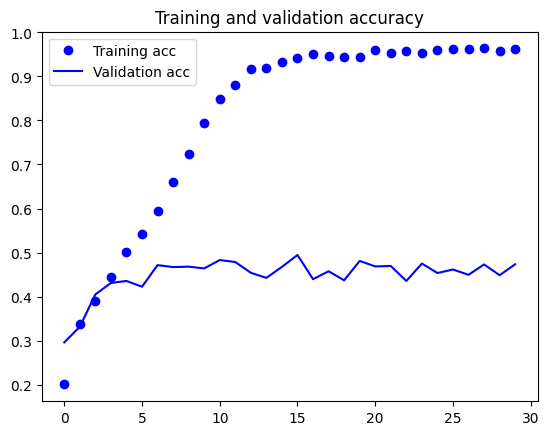

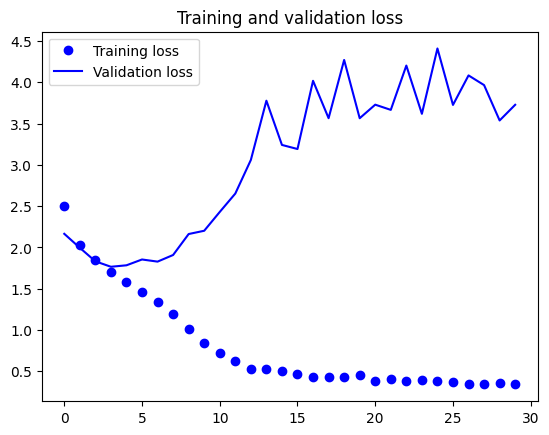

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc_1C = history_1C.history['accuracy']
val_acc_1C = history_1C.history['val_accuracy']
loss_1C = history_1C.history['loss']
val_loss_1C = history_1C.history['val_loss']

epochs_1C = range(len(acc_1C))

plt.plot(epochs_1C, acc_1C, 'bo', label='Training acc')
plt.plot(epochs_1C, val_acc_1C, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_1C, loss_1C, 'bo', label='Training loss')
plt.plot(epochs_1C, val_loss_1C, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model_1C.save('/content/drive/My Drive/NP DL/ASG1/food_model_1C.h5')

# from google.colab import files
# files.download('food_model_1C.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Model #1C_2 - with L2 Weight Regularization, Average-Pooling and Adam Optimizer

In [ ]:
# Build the Model

# image size
# img_size = 150

model_1C_2 = models.Sequential()
# feature extraction layers
model_1C_2.add(layers.Conv2D(32, (3, 3), activation='relu',
                           input_shape=(img_size, img_size, 3)))
model_1C_2.add(layers.AveragePooling2D((2, 2)))  # changed to AveragePooling from MaxPooling
model_1C_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1C_2.add(layers.AveragePooling2D((2, 2)))  # changed to AveragePooling from MaxPooling
model_1C_2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_1C_2.add(layers.AveragePooling2D((2, 2)))  # changed to AveragePooling from MaxPooling
model_1C_2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_1C_2.add(layers.AveragePooling2D((2, 2)))  # changed to AveragePooling from MaxPooling
# classifier layers
model_1C_2.add(layers.Flatten())
model_1C_2.add(layers.Dense(256, 
                          kernel_regularizer=regularizers.l2(0.001),  # added L2 regularizer
                          activation='relu'))
model_1C_2.add(layers.Dense(10, activation='softmax'))

In [ ]:
model_1C_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 average_pooling2d (AverageP  (None, 74, 74, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 average_pooling2d_1 (Averag  (None, 36, 36, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 average_pooling2d_2 (Averag  (None, 17, 17, 128)     

In [ ]:
# compile the model
model_1C_2.compile(optimizer=optimizers.Adam(learning_rate=1e-3),  # changed to Adam optimizer from RMSprop
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
# # data preprocessing

# # rescale pixel values (0 and 255) to [0, 1] interval
# train_datagen = ImageDataGenerator(rescale=1./255)  # floating point
# test_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(
#         # path to target directory
#         train_dir,
#         # images target size
#         target_size=(img_size, img_size),
#         batch_size=75,
#         # type of label arrays
#         class_mode='categorical')

# validation_generator = test_datagen.flow_from_directory(
#         validation_dir,
#         target_size=(img_size, img_size),
#         batch_size=40,
#         class_mode='categorical')

In [ ]:
# Train the Model

# fit the model
history_1C_2 = model_1C_2.fit(train_generator,
                          steps_per_epoch=100,  #train_sample_size/data_batch_size
                          epochs=30,
                          validation_data=validation_generator,
                          validation_steps=50)  #validation_sample_size/data_batch_size

Epoch 1/30
100/100 [==============================] - 60s 581ms/step - loss: 2.2020 - accuracy: 0.2377 - val_loss: 1.9854 - val_accuracy: 0.3340
Epoch 2/30
100/100 [==============================] - 58s 578ms/step - loss: 1.8969 - accuracy: 0.3475 - val_loss: 1.9349 - val_accuracy: 0.3490
Epoch 3/30
100/100 [==============================] - 57s 569ms/step - loss: 1.7937 - accuracy: 0.4024 - val_loss: 1.8261 - val_accuracy: 0.4010
Epoch 4/30
100/100 [==============================] - 57s 573ms/step - loss: 1.6799 - accuracy: 0.4519 - val_loss: 1.7941 - val_accuracy: 0.4190
Epoch 5/30
100/100 [==============================] - 57s 574ms/step - loss: 1.6025 - accuracy: 0.4795 - val_loss: 1.7749 - val_accuracy: 0.4255
Epoch 6/30
100/100 [==============================] - 57s 572ms/step - loss: 1.5056 - accuracy: 0.5252 - val_loss: 1.7491 - val_accuracy: 0.4470
Epoch 7/30
100/100 [==============================] - 57s 570ms/step - loss: 1.4226 - accuracy: 0.5545 - val_loss: 1.7604 - val_ac

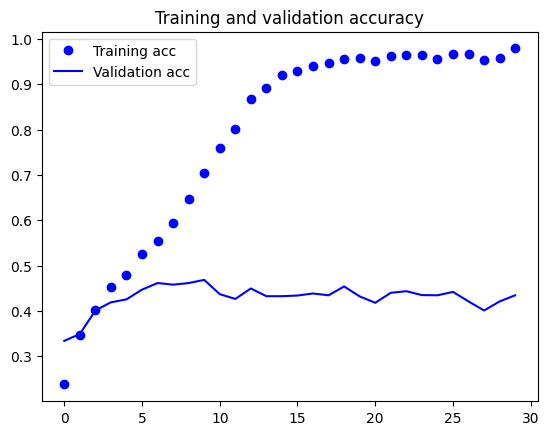

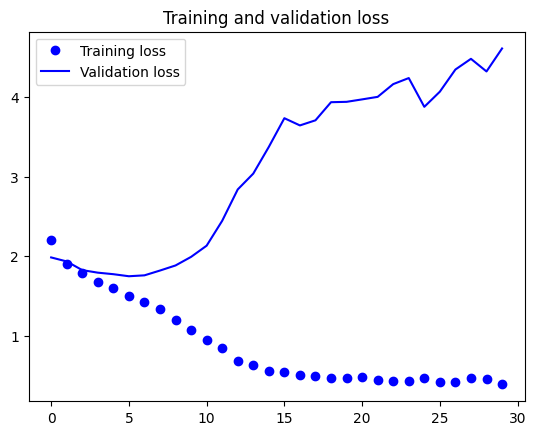

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc_1C_2 = history_1C_2.history['accuracy']
val_acc_1C_2 = history_1C_2.history['val_accuracy']
loss_1C_2 = history_1C_2.history['loss']
val_loss_1C_2 = history_1C_2.history['val_loss']

epochs_1C_2 = range(len(acc_1C_2))

plt.plot(epochs_1C_2, acc_1C_2, 'bo', label='Training acc')
plt.plot(epochs_1C_2, val_acc_1C_2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_1C_2, loss_1C_2, 'bo', label='Training loss')
plt.plot(epochs_1C_2, val_loss_1C_2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model_1C_2.save('/content/drive/My Drive/NP DL/ASG1/food_model_1C_2.h5')

# from google.colab import files
# files.download('food_model_1C_2.h5')

### Model #1D - with Dropout Layer

In [ ]:
# Build the Model

# image size
# img_size = 150

model_1D = models.Sequential()
# feature extraction layers
model_1D.add(layers.Conv2D(32, (3, 3), activation='relu',
                           input_shape=(img_size, img_size, 3)))
model_1D.add(layers.MaxPooling2D((2, 2)))
model_1D.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1D.add(layers.MaxPooling2D((2, 2)))
model_1D.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_1D.add(layers.MaxPooling2D((2, 2)))
model_1D.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_1D.add(layers.MaxPooling2D((2, 2)))
# classifier layers
model_1D.add(layers.Flatten())
model_1D.add(layers.Dropout(0.5))  # added dropout layer
model_1D.add(layers.Dense(256, 
                          kernel_regularizer=regularizers.l2(0.001),  
                          activation='relu'))
model_1D.add(layers.Dense(10, activation='softmax'))

In [ ]:
model_1D.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_64 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_65 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_65 (MaxPoolin  (None, 17, 17, 128)    

In [ ]:
# compile the model
model_1D.compile(optimizer=optimizers.RMSprop(learning_rate=1e-3),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
# # data preprocessing

# # rescale pixel values (0 and 255) to [0, 1] interval
# train_datagen = ImageDataGenerator(rescale=1./255)  # floating point
# test_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(
#         # path to target directory
#         train_dir,
#         # images target size
#         target_size=(img_size, img_size),
#         batch_size=75,
#         # type of label arrays
#         class_mode='categorical')

# validation_generator = test_datagen.flow_from_directory(
#         validation_dir,
#         target_size=(img_size, img_size),
#         batch_size=40,
#         class_mode='categorical')

In [ ]:
# Train the Model

# fit the model
history_1D = model_1D.fit(train_generator,
                          steps_per_epoch=100,  #train_sample_size/data_batch_size
                          epochs=100,
                          validation_data=validation_generator,
                          validation_steps=50)  #validation_sample_size/data_batch_size

Epoch 1/100
100/100 [==============================] - 60s 579ms/step - loss: 2.5299 - accuracy: 0.1891 - val_loss: 2.2720 - val_accuracy: 0.2395
Epoch 2/100
100/100 [==============================] - 57s 566ms/step - loss: 2.0876 - accuracy: 0.3157 - val_loss: 2.0908 - val_accuracy: 0.3095
Epoch 3/100
100/100 [==============================] - 57s 567ms/step - loss: 1.8981 - accuracy: 0.3767 - val_loss: 1.9201 - val_accuracy: 0.3705
Epoch 4/100
100/100 [==============================] - 56s 565ms/step - loss: 1.7525 - accuracy: 0.4317 - val_loss: 1.8528 - val_accuracy: 0.4050
Epoch 5/100
100/100 [==============================] - 56s 566ms/step - loss: 1.6602 - accuracy: 0.4780 - val_loss: 1.9075 - val_accuracy: 0.3810
Epoch 6/100
100/100 [==============================] - 58s 578ms/step - loss: 1.5700 - accuracy: 0.5156 - val_loss: 1.7132 - val_accuracy: 0.4825
Epoch 7/100
100/100 [==============================] - 57s 568ms/step - loss: 1.5011 - accuracy: 0.5437 - val_loss: 1.7320 -

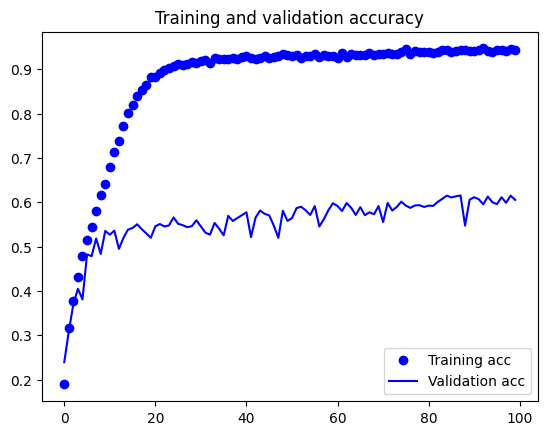

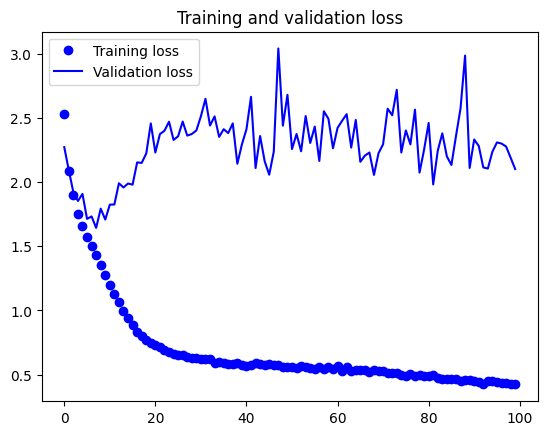

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc_1D = history_1D.history['accuracy']
val_acc_1D = history_1D.history['val_accuracy']
loss_1D = history_1D.history['loss']
val_loss_1D = history_1D.history['val_loss']

epochs_1D = range(len(acc_1D))

plt.plot(epochs_1D, acc_1D, 'bo', label='Training acc')
plt.plot(epochs_1D, val_acc_1D, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_1D, loss_1D, 'bo', label='Training loss')
plt.plot(epochs_1D, val_loss_1D, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model_1D.save('/content/drive/My Drive/NP DL/ASG1/food_model_1D.h5')

# from google.colab import files
# files.download('food_model_1D.h5')

### Model #1D_2 - with Dropout Layer, Average-Pooling and SGD Optimizer

In [16]:
# Build the Model

# image size
# img_size = 150

model_1D_2 = models.Sequential()
# feature extraction layers
model_1D_2.add(layers.Conv2D(32, (3, 3), activation='relu',
                           input_shape=(img_size, img_size, 3)))
model_1D_2.add(layers.AveragePooling2D((2, 2)))  # changed to AveragePooling from MaxPooling
model_1D_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1D_2.add(layers.AveragePooling2D((2, 2)))  # changed to AveragePooling from MaxPooling
model_1D_2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_1D_2.add(layers.AveragePooling2D((2, 2)))  # changed to AveragePooling from MaxPooling
model_1D_2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_1D_2.add(layers.AveragePooling2D((2, 2)))  # changed to AveragePooling from MaxPooling
# classifier layers
model_1D_2.add(layers.Flatten())
model_1D_2.add(layers.Dropout(0.5))  # added dropout layer
model_1D_2.add(layers.Dense(256, 
                          kernel_regularizer=regularizers.l2(0.001),  
                          activation='relu'))
model_1D_2.add(layers.Dense(10, activation='softmax'))

In [17]:
model_1D_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 average_pooling2d_4 (Averag  (None, 74, 74, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 average_pooling2d_5 (Averag  (None, 36, 36, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 average_pooling2d_6 (Averag  (None, 17, 17, 128)     

In [18]:
# compile the model
model_1D_2.compile(optimizer=optimizers.SGD(learning_rate=1e-3),  # changed to SGD optimizer from RMSprop
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [19]:
# # data preprocessing

# # rescale pixel values (0 and 255) to [0, 1] interval
# train_datagen = ImageDataGenerator(rescale=1./255)  # floating point
# test_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(
#         # path to target directory
#         train_dir,
#         # images target size
#         target_size=(img_size, img_size),
#         batch_size=75,
#         # type of label arrays
#         class_mode='categorical')

# validation_generator = test_datagen.flow_from_directory(
#         validation_dir,
#         target_size=(img_size, img_size),
#         batch_size=40,
#         class_mode='categorical')

In [20]:
# Train the Model

# fit the model
history_1D_2 = model_1D_2.fit(train_generator,
                          steps_per_epoch=100,  #train_sample_size/data_batch_size
                          epochs=100,
                          validation_data=validation_generator,
                          validation_steps=50)  #validation_sample_size/data_batch_size

Epoch 1/100
100/100 [==============================] - 4568s 46s/step - loss: 2.7986 - accuracy: 0.0839 - val_loss: 2.7965 - val_accuracy: 0.0760
Epoch 2/100
100/100 [==============================] - 57s 576ms/step - loss: 2.7970 - accuracy: 0.0952 - val_loss: 2.7951 - val_accuracy: 0.0975
Epoch 3/100
100/100 [==============================] - 57s 569ms/step - loss: 2.7954 - accuracy: 0.0980 - val_loss: 2.7940 - val_accuracy: 0.1210
Epoch 4/100
100/100 [==============================] - 58s 577ms/step - loss: 2.7939 - accuracy: 0.1077 - val_loss: 2.7930 - val_accuracy: 0.1295
Epoch 5/100
100/100 [==============================] - 59s 586ms/step - loss: 2.7930 - accuracy: 0.1077 - val_loss: 2.7920 - val_accuracy: 0.1260
Epoch 6/100
100/100 [==============================] - 68s 686ms/step - loss: 2.7917 - accuracy: 0.1111 - val_loss: 2.7910 - val_accuracy: 0.1235
Epoch 7/100
100/100 [==============================] - 67s 669ms/step - loss: 2.7914 - accuracy: 0.1113 - val_loss: 2.7902 -

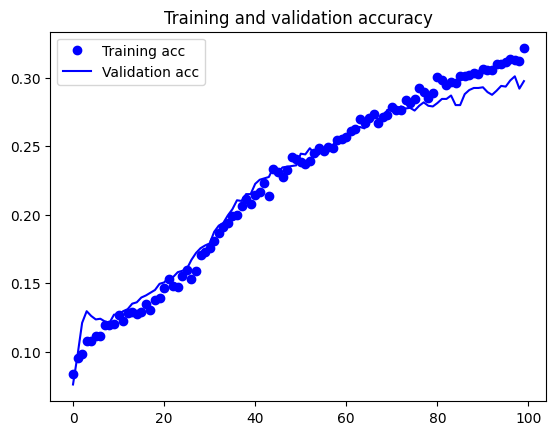

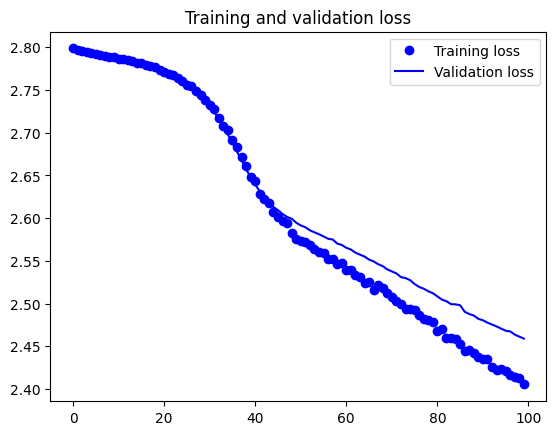

In [21]:
# Plot the Training and Validation Accuracy & Loss Scores
acc_1D_2 = history_1D_2.history['accuracy']
val_acc_1D_2 = history_1D_2.history['val_accuracy']
loss_1D_2 = history_1D_2.history['loss']
val_loss_1D_2 = history_1D_2.history['val_loss']

epochs_1D_2 = range(len(acc_1D_2))

plt.plot(epochs_1D_2, acc_1D_2, 'bo', label='Training acc')
plt.plot(epochs_1D_2, val_acc_1D_2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_1D_2, loss_1D_2, 'bo', label='Training loss')
plt.plot(epochs_1D_2, val_loss_1D_2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [22]:
# Save the Model
model_1D_2.save('/content/drive/My Drive/NP DL/ASG1/food_model_1D_2.h5')

# from google.colab import files
# files.download('food_model_1D_2.h5')

### Model #1E - with Reduced Learning Rate

In [ ]:
# Build the Model

# image size
# img_size = 150

model_1E = models.Sequential()
# feature extraction layers
model_1E.add(layers.Conv2D(32, (3, 3), activation='relu',
                           input_shape=(img_size, img_size, 3)))
model_1E.add(layers.MaxPooling2D((2, 2)))
model_1E.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1E.add(layers.MaxPooling2D((2, 2)))
model_1E.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_1E.add(layers.MaxPooling2D((2, 2)))
model_1E.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_1E.add(layers.MaxPooling2D((2, 2)))
# classifier layers
model_1E.add(layers.Flatten())
model_1E.add(layers.Dropout(0.5))
model_1E.add(layers.Dense(256, 
                          kernel_regularizer=regularizers.l2(0.001),  
                          activation='relu'))
model_1E.add(layers.Dense(10, activation='softmax'))

In [ ]:
model_1E.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
# compile the model
model_1E.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),  # reduced optimizer's learning rate from 0.001 to 0.0001
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
# # data preprocessing

# # rescale pixel values (0 and 255) to [0, 1] interval
# train_datagen = ImageDataGenerator(rescale=1./255)  # floating point
# test_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(
#         # path to target directory
#         train_dir,
#         # images target size
#         target_size=(img_size, img_size),
#         batch_size=75,
#         # type of label arrays
#         class_mode='categorical')

# validation_generator = test_datagen.flow_from_directory(
#         validation_dir,
#         target_size=(img_size, img_size),
#         batch_size=40,
#         class_mode='categorical')

In [ ]:
# Train the Model

# fit the model
history_1E = model_1E.fit(train_generator,
                          steps_per_epoch=100,  #train_sample_size/data_batch_size
                          epochs=100,
                          validation_data=validation_generator,
                          validation_steps=50)  #validation_sample_size/data_batch_size

Epoch 1/100
100/100 [==============================] - 1925s 19s/step - loss: 2.6885 - accuracy: 0.1871 - val_loss: 2.5204 - val_accuracy: 0.2725
Epoch 2/100
100/100 [==============================] - 57s 567ms/step - loss: 2.3967 - accuracy: 0.3067 - val_loss: 2.3708 - val_accuracy: 0.3265
Epoch 3/100
100/100 [==============================] - 66s 658ms/step - loss: 2.2771 - accuracy: 0.3479 - val_loss: 2.3203 - val_accuracy: 0.3155
Epoch 4/100
100/100 [==============================] - 56s 564ms/step - loss: 2.2001 - accuracy: 0.3733 - val_loss: 2.2319 - val_accuracy: 0.3670
Epoch 5/100
100/100 [==============================] - 56s 563ms/step - loss: 2.1302 - accuracy: 0.3953 - val_loss: 2.2339 - val_accuracy: 0.3465
Epoch 6/100
100/100 [==============================] - 56s 562ms/step - loss: 2.0680 - accuracy: 0.4183 - val_loss: 2.1115 - val_accuracy: 0.3940
Epoch 7/100
100/100 [==============================] - 56s 565ms/step - loss: 2.0110 - accuracy: 0.4313 - val_loss: 2.0939 -

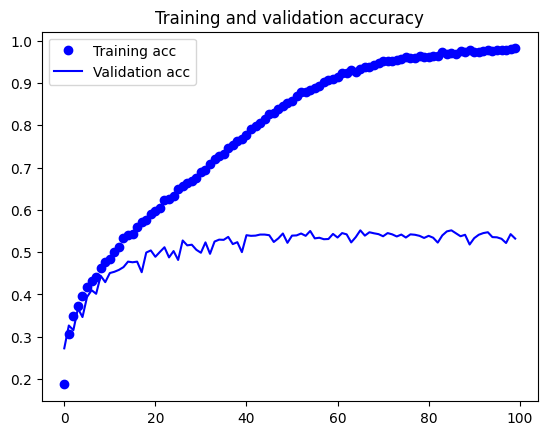

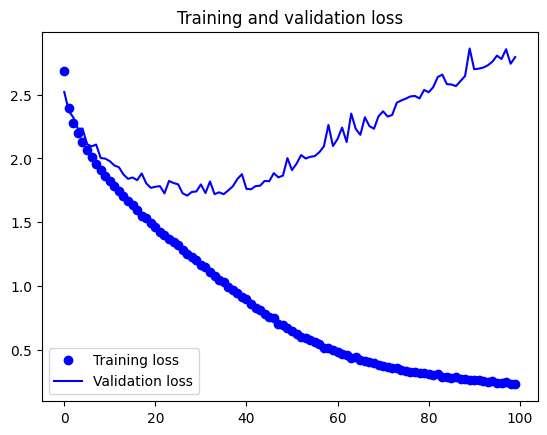

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc_1E = history_1E.history['accuracy']
val_acc_1E = history_1E.history['val_accuracy']
loss_1E = history_1E.history['loss']
val_loss_1E = history_1E.history['val_loss']

epochs_1E = range(len(acc_1E))

plt.plot(epochs_1E, acc_1E, 'bo', label='Training acc')
plt.plot(epochs_1E, val_acc_1E, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_1E, loss_1E, 'bo', label='Training loss')
plt.plot(epochs_1E, val_loss_1E, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model_1E.save('/content/drive/My Drive/NP DL/ASG1/food_model_1E.h5')

# from google.colab import files
# files.download('food_model_1E.h5')

### Model #1F - with Data Augmentation

In [ ]:
# Build the Model

# image size
# img_size = 150

model_1F = models.Sequential()
# feature extraction layers
model_1F.add(layers.Conv2D(32, (3, 3), activation='relu',
                           input_shape=(img_size, img_size, 3)))
model_1F.add(layers.MaxPooling2D((2, 2)))
model_1F.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1F.add(layers.MaxPooling2D((2, 2)))
model_1F.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_1F.add(layers.MaxPooling2D((2, 2)))
model_1F.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_1F.add(layers.MaxPooling2D((2, 2)))
# classifier layers
model_1F.add(layers.Flatten())
model_1F.add(layers.Dropout(0.5))
model_1F.add(layers.Dense(256, 
                          kernel_regularizer=regularizers.l2(0.001),  
                          activation='relu'))
model_1F.add(layers.Dense(10, activation='softmax'))

In [ ]:
model_1F.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
# compile the model
model_1F.compile(optimizer=optimizers.RMSprop(learning_rate=1e-3),  # increased learning rate back to 0.001
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
# data preprocessing

# data augmentation
train_datagen_da_1 = ImageDataGenerator(
        rescale=1./255,  # rescale pixel values (0 and 255) to [0, 1] interval
        rotation_range=40,  # degrees
        width_shift_range=0.2,  # fraction of width to translate horizontally
        height_shift_range=0.2,  # fraction of height to translate vertically
        shear_range=0.2,  # shear angle in ccw direction
        zoom_range=0.2, # float
        horizontal_flip=True,
        fill_mode='nearest')  # strategy used for filling newly created pixels after transformation

# Note that the validation data should not be augmented!
test_datagen_da_1 = ImageDataGenerator(rescale=1./255)

train_generator_da_1 = train_datagen_da_1.flow_from_directory(
        # target directory
        train_dir,
        # images target size
        target_size=(img_size, img_size),
        batch_size=75,
        # type of label arrays
        class_mode='categorical')

validation_generator_da_1 = test_datagen_da_1.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=40,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [ ]:
# Train the Model

# fit the model
history_1F = model_1F.fit(train_generator_da_1,
                          steps_per_epoch=100,  #train_sample_size/data_batch_size
                          epochs=100,
                          validation_data=validation_generator_da_1,
                          validation_steps=50)  #validation_sample_size/data_batch_size

Epoch 1/100
100/100 [==============================] - 95s 927ms/step - loss: 2.5322 - accuracy: 0.1820 - val_loss: 2.2302 - val_accuracy: 0.2835
Epoch 2/100
100/100 [==============================] - 102s 1s/step - loss: 2.1812 - accuracy: 0.2747 - val_loss: 2.0291 - val_accuracy: 0.3200
Epoch 3/100
100/100 [==============================] - 93s 934ms/step - loss: 2.0528 - accuracy: 0.3127 - val_loss: 2.1022 - val_accuracy: 0.2935
Epoch 4/100
100/100 [==============================] - 92s 924ms/step - loss: 1.9697 - accuracy: 0.3428 - val_loss: 1.9472 - val_accuracy: 0.3465
Epoch 5/100
100/100 [==============================] - 91s 915ms/step - loss: 1.9077 - accuracy: 0.3725 - val_loss: 1.8111 - val_accuracy: 0.4190
Epoch 6/100
100/100 [==============================] - 92s 923ms/step - loss: 1.8650 - accuracy: 0.3927 - val_loss: 1.7855 - val_accuracy: 0.4285
Epoch 7/100
100/100 [==============================] - 92s 926ms/step - loss: 1.8215 - accuracy: 0.4093 - val_loss: 2.0229 - v

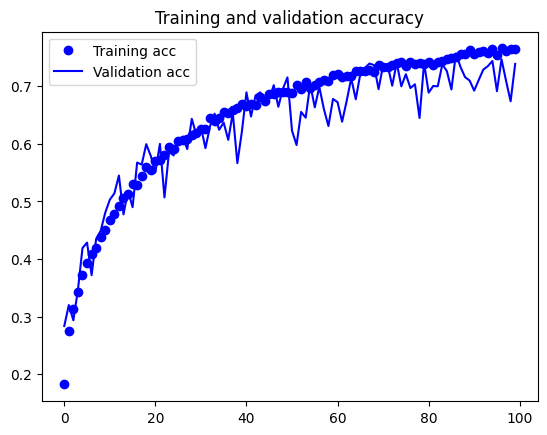

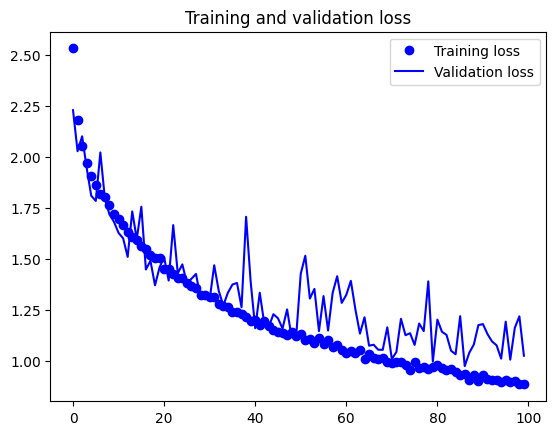

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc_1F = history_1F.history['accuracy']
val_acc_1F = history_1F.history['val_accuracy']
loss_1F = history_1F.history['loss']
val_loss_1F = history_1F.history['val_loss']

epochs_1F = range(len(acc_1F))

plt.plot(epochs_1F, acc_1F, 'bo', label='Training acc')
plt.plot(epochs_1F, val_acc_1F, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_1F, loss_1F, 'bo', label='Training loss')
plt.plot(epochs_1F, val_loss_1F, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model_1F.save('/content/drive/My Drive/NP DL/ASG1/food_model_1F.h5')

# from google.colab import files
# files.download('food_model_1F.h5')

### Model #2 - Pretrained Model VGG16

### Model #2A - Feature Extraction without Data Augmentation 

In [34]:
# Build the Model
# img_size = 150

conv_base = VGG16(weights='imagenet',  # already pre-trained with 1000 classes with 1.4M images sample
                  include_top=False,  # exclude classifier portion
                  input_shape=(img_size, img_size, 3))

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [35]:
datagen = ImageDataGenerator(rescale=1./255)  # rescaling

batch_size = 20

def extract_features(directory, sample_count):  # features extraction  # push images from directory into conv_base model and get features of 4x4x512
    features = np.zeros(shape=(sample_count, 4, 4, 512))  # output shape  # 4,4,512 from model output
    labels = np.zeros(shape=(sample_count, 10))  # output label  # 10 classes
    generator = datagen.flow_from_directory(
        directory,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:  # generator  # will run in batches
        features_batch = conv_base.predict(inputs_batch)  # prediction  # don't need target when using predict  # this line will take abit of time as it needs to pass through the entire model
        features[i * batch_size : (i + 1) * batch_size] = features_batch  # assign to array  # i*batch_size is counting steps_per_epoch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:  # once steps per epoch reaches sample_count, it will break
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 7500)  # directory, sample_count
validation_features, validation_labels = extract_features(validation_dir, 2000)
test_features, test_labels = extract_features(test_dir, 500)

Found 7500 images belonging to 10 classes.
1/1 [==============================] - 0s 25ms/step
Found 2000 images belonging to 10 classes.
1/1 [==============================] - 0s 32ms/step
Found 500 images belonging to 10 classes.
1/1 [==============================] - 0s 20ms/step


In [36]:
print(train_features.shape)  # 7500 training images output shape
print(train_labels.shape)

(7500, 4, 4, 512)
(7500, 10)


In [37]:
# reshape to 1D tensor (from 3D tensor)
train_features = np.reshape(train_features, (7500, 4 * 4 * 512)) 
validation_features = np.reshape(validation_features, (2000, 4 * 4 * 512))
test_features = np.reshape(test_features, (500, 4 * 4 * 512))

In [ ]:
# classifier model
model_2A = models.Sequential() 
model_2A.add(layers.Dense(256, activation='relu', input_shape=(4 * 4 * 512,)))
model_2A.add(layers.Dense(10, activation='softmax'))

In [ ]:
# compile the model
model_2A.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the Model
history_2A = model_2A.fit(train_features, train_labels,  # instead of the usual train_generator
                          epochs=30,
                          batch_size=20,
                          validation_data=(validation_features, validation_labels))

Epoch 1/30
375/375 [==============================] - 4s 4ms/step - loss: 1.8036 - accuracy: 0.4136 - val_loss: 1.5328 - val_accuracy: 0.5045
Epoch 2/30
375/375 [==============================] - 1s 3ms/step - loss: 1.2661 - accuracy: 0.6176 - val_loss: 1.2850 - val_accuracy: 0.5920
Epoch 3/30
375/375 [==============================] - 1s 3ms/step - loss: 1.0567 - accuracy: 0.6820 - val_loss: 1.1791 - val_accuracy: 0.6345
Epoch 4/30
375/375 [==============================] - 1s 4ms/step - loss: 0.9332 - accuracy: 0.7188 - val_loss: 1.1139 - val_accuracy: 0.6450
Epoch 5/30
375/375 [==============================] - 1s 4ms/step - loss: 0.8466 - accuracy: 0.7447 - val_loss: 1.0741 - val_accuracy: 0.6585
Epoch 6/30
375/375 [==============================] - 1s 3ms/step - loss: 0.7799 - accuracy: 0.7663 - val_loss: 1.0425 - val_accuracy: 0.6760
Epoch 7/30
375/375 [==============================] - 1s 4ms/step - loss: 0.7242 - accuracy: 0.7837 - val_loss: 1.0265 - val_accuracy: 0.6730
Epoch 

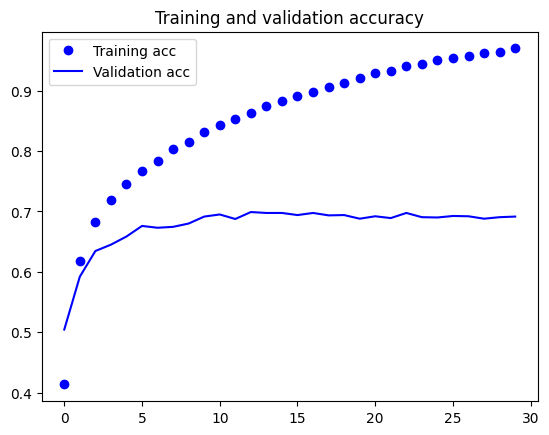

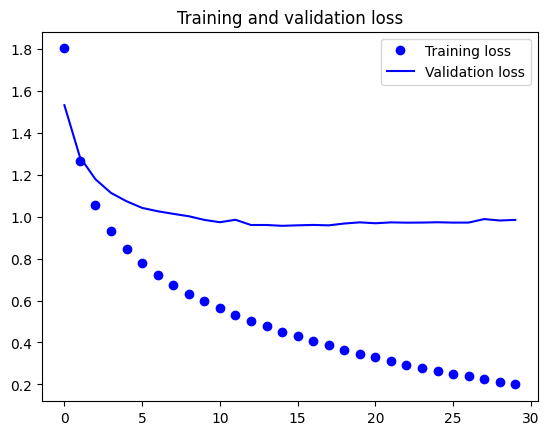

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc_2A = history_2A.history['accuracy']
val_acc_2A = history_2A.history['val_accuracy']
loss_2A = history_2A.history['loss']
val_loss_2A = history_2A.history['val_loss']

epochs_2A = range(len(acc_2A))

plt.plot(epochs_2A, acc_2A, 'bo', label='Training acc')
plt.plot(epochs_2A, val_acc_2A, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_2A, loss_2A, 'bo', label='Training loss')
plt.plot(epochs_2A, val_loss_2A, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model_2A.save('/content/drive/My Drive/NP DL/ASG1/food_model_2A.h5')

# from google.colab import files
# files.download('food_model_2A.h5')

### Model #2B - Feature Extraction with Data Augmentation 

In [ ]:
# Build the Model
# img_size = 150

# conv_base = VGG16(weights='imagenet',  # already pre-trained with 1000 classes with 1.4M images sample
#                   include_top=False,  # exclude classifier portion
#                   input_shape=(img_size, img_size, 3))

model_2B = models.Sequential()
model_2B.add(conv_base)
model_2B.add(layers.Flatten())  # with this flatten layer, we dont have to do reshaping
model_2B.add(layers.Dense(256, activation='relu'))
model_2B.add(layers.Dense(10, activation='softmax'))

# freeze convolutional base
conv_base.trainable = False

In [ ]:
model_2B.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 8192)              0         
                                                                 
 dense_12 (Dense)            (None, 256)               2097408   
                                                                 
 dense_13 (Dense)            (None, 10)                2570      
                                                                 
Total params: 16,814,666
Trainable params: 2,099,978
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
# compile the model
model_2B.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
# data preprocessing

# data augmentation
train_datagen_da_2 = ImageDataGenerator(
        rescale=1./255,  # rescale pixel values (0 and 255) to [0, 1] interval
        rotation_range=40,  # degrees
        width_shift_range=0.2,  # fraction of width to translate horizontally
        height_shift_range=0.2,  # fraction of height to translate vertically
        shear_range=0.2,  # shear angle in ccw direction
        zoom_range=0.2, # float
        horizontal_flip=True,
        fill_mode='nearest')  # strategy used for filling newly created pixels after transformation

# Note that the validation data should not be augmented!
test_datagen_da_2 = ImageDataGenerator(rescale=1./255)

train_generator_da_2 = train_datagen_da_2.flow_from_directory(
        # target directory
        train_dir,
        # images target size
        target_size=(img_size, img_size),
        batch_size=75,
        # type of label arrays
        class_mode='categorical')

validation_generator_da_2 = test_datagen_da_2.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=40,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [ ]:
# Train the Model
# fit the model
history_2B = model_2B.fit(train_generator_da_2,
                          steps_per_epoch=100,  #train_sample_size/data_batch_size
                          epochs=100,
                          validation_data=validation_generator_da_2,
                          validation_steps=50)  #validation_sample_size/data_batch_size

Epoch 1/100
100/100 [==============================] - 126s 1s/step - loss: 2.1165 - accuracy: 0.2593 - val_loss: 1.8900 - val_accuracy: 0.4010
Epoch 2/100
100/100 [==============================] - 92s 920ms/step - loss: 1.8187 - accuracy: 0.4217 - val_loss: 1.6549 - val_accuracy: 0.4890
Epoch 3/100
100/100 [==============================] - 93s 931ms/step - loss: 1.6319 - accuracy: 0.4837 - val_loss: 1.4967 - val_accuracy: 0.5320
Epoch 4/100
100/100 [==============================] - 93s 933ms/step - loss: 1.5101 - accuracy: 0.5159 - val_loss: 1.3915 - val_accuracy: 0.5660
Epoch 5/100
100/100 [==============================] - 102s 1s/step - loss: 1.4207 - accuracy: 0.5469 - val_loss: 1.3243 - val_accuracy: 0.5880
Epoch 6/100
100/100 [==============================] - 92s 914ms/step - loss: 1.3582 - accuracy: 0.5691 - val_loss: 1.2675 - val_accuracy: 0.6050
Epoch 7/100
100/100 [==============================] - 93s 928ms/step - loss: 1.3005 - accuracy: 0.5859 - val_loss: 1.2354 - val

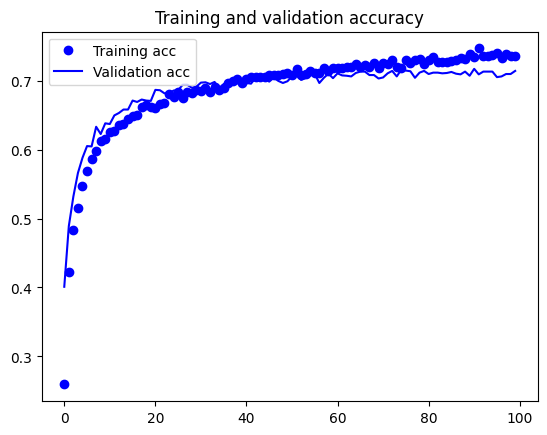

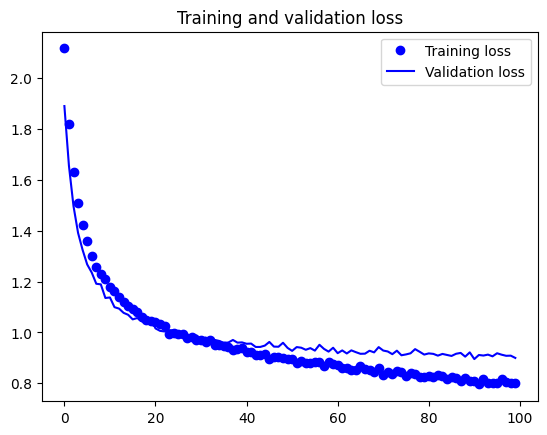

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc_2B = history_2B.history['accuracy']
val_acc_2B = history_2B.history['val_accuracy']
loss_2B = history_2B.history['loss']
val_loss_2B = history_2B.history['val_loss']

epochs_2B = range(len(acc_2B))

plt.plot(epochs_2B, acc_2B, 'bo', label='Training acc')
plt.plot(epochs_2B, val_acc_2B, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_2B, loss_2B, 'bo', label='Training loss')
plt.plot(epochs_2B, val_loss_2B, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model_2B.save('/content/drive/My Drive/NP DL/ASG1/food_model_2B.h5')

# from google.colab import files
# files.download('food_model_2B.h5')

### Model #2C - Fine Tuning with Data Augmentation and Reduced Learning Rate

In [ ]:
# Build the Model
# img_size = 150

conv_base_2C = VGG16(weights='imagenet',  # already pre-trained with 1000 classes with 1.4M images sample
                  include_top=False,  # exclude classifier portion
                  input_shape=(img_size, img_size, 3))

model_2C = models.Sequential()
model_2C.add(conv_base_2C)
model_2C.add(layers.Flatten())  # with this flatten layer, we dont have to do reshaping
model_2C.add(layers.Dense(256, activation='relu'))
model_2C.add(layers.Dense(10, activation='softmax'))

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
conv_base_2C.trainable = True  # unfreeze for all blocks, everything trainable

set_trainable = False
for layer in conv_base_2C.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True # after black5_conv1, set_trainable becomes True
    if set_trainable:
        layer.trainable = True  # unfreeze everything after the 1st layer in black5_conv1
    else:
        layer.trainable = False
             
model_2C.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 16,814,666
Trainable params: 9,179,402
Non-trainable params: 7,635,264
_________________________________________________________________


In [ ]:
# compile the model
model_2C.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5),  # reduced learning rate from 0.00002 to 0.00001
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
# # data preprocessing

# # data augmentation
# train_datagen_da_2 = ImageDataGenerator(
#         rescale=1./255,  # rescale pixel values (0 and 255) to [0, 1] interval
#         rotation_range=40,  # degrees
#         width_shift_range=0.2,  # fraction of width to translate horizontally
#         height_shift_range=0.2,  # fraction of height to translate vertically
#         shear_range=0.2,  # shear angle in ccw direction
#         zoom_range=0.2, # float
#         horizontal_flip=True,
#         fill_mode='nearest')  # strategy used for filling newly created pixels after transformation

# # Note that the validation data should not be augmented!
# test_datagen_da_2 = ImageDataGenerator(rescale=1./255)

# train_generator_da_2 = train_datagen_da_2.flow_from_directory(
#         # target directory
#         train_dir,
#         # images target size
#         target_size=(img_size, img_size),
#         batch_size=75,
#         # type of label arrays
#         class_mode='categorical')

# validation_generator_da_2 = test_datagen_da_2.flow_from_directory(
#         validation_dir,
#         target_size=(img_size, img_size),
#         batch_size=40,
#         class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [ ]:
# Train the Model
# fit the model
history_2C = model_2C.fit(train_generator_da_2,
                          steps_per_epoch=100,  #train_sample_size/data_batch_size
                          epochs=100,
                          validation_data=validation_generator_da_2,
                          validation_steps=50)  #validation_sample_size/data_batch_size

Epoch 1/100
100/100 [==============================] - 6305s 63s/step - loss: 2.0213 - accuracy: 0.3043 - val_loss: 1.6025 - val_accuracy: 0.4715
Epoch 2/100
100/100 [==============================] - 103s 1s/step - loss: 1.4893 - accuracy: 0.4991 - val_loss: 1.2993 - val_accuracy: 0.5660
Epoch 3/100
100/100 [==============================] - 110s 1s/step - loss: 1.2539 - accuracy: 0.5808 - val_loss: 1.1446 - val_accuracy: 0.6255
Epoch 4/100
100/100 [==============================] - 110s 1s/step - loss: 1.1110 - accuracy: 0.6363 - val_loss: 1.0411 - val_accuracy: 0.6615
Epoch 5/100
100/100 [==============================] - 102s 1s/step - loss: 1.0237 - accuracy: 0.6636 - val_loss: 0.9577 - val_accuracy: 0.6990
Epoch 6/100
100/100 [==============================] - 103s 1s/step - loss: 0.9553 - accuracy: 0.6863 - val_loss: 0.9455 - val_accuracy: 0.7005
Epoch 7/100
100/100 [==============================] - 103s 1s/step - loss: 0.9117 - accuracy: 0.7013 - val_loss: 0.8969 - val_accurac

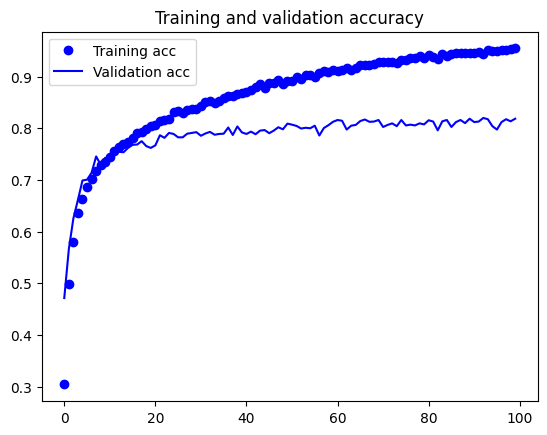

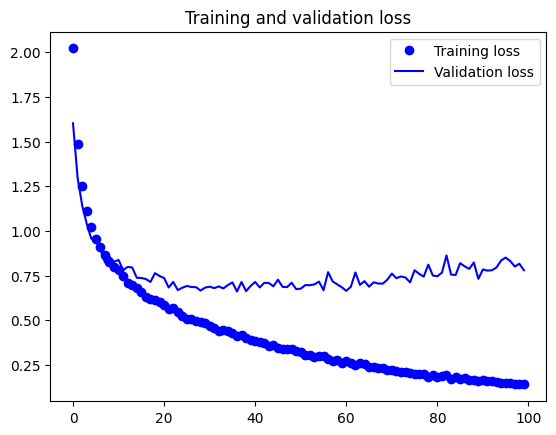

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc_2C = history_2C.history['accuracy']
val_acc_2C = history_2C.history['val_accuracy']
loss_2C = history_2C.history['loss']
val_loss_2C = history_2C.history['val_loss']

epochs_2C = range(len(acc_2C))

plt.plot(epochs_2C, acc_2C, 'bo', label='Training acc')
plt.plot(epochs_2C, val_acc_2C, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_2C, loss_2C, 'bo', label='Training loss')
plt.plot(epochs_2C, val_loss_2C, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model_2C.save('/content/drive/My Drive/NP DL/ASG1/food_model_2C.h5')

# from google.colab import files
# files.download('food_model_2C.h5')

### Model #2D - Fine Tuning with Dropout Layer (with Data Augmentation and Reduced Learning Rate)

In [51]:
# Build the Model
# img_size = 150

conv_base_2D = VGG16(weights='imagenet',  # already pre-trained with 1000 classes with 1.4M images sample
                  include_top=False,  # exclude classifier portion
                  input_shape=(img_size, img_size, 3))

model_2D = models.Sequential()
model_2D.add(conv_base_2D)
model_2D.add(layers.Flatten())  # with this flatten layer, we dont have to do reshaping
model_2D.add(layers.Dense(256, activation='relu'))
model_2D.add(layers.Dropout(0.5))  # added dropout layer
model_2D.add(layers.Dense(10, activation='softmax'))

In [52]:
conv_base_2D.trainable = True  # unfreeze for all blocks, everything trainable

def print_layer_trainable():
    for layer in conv_base_2D.layers:
        print("{0}:\t{1}".format(layer.trainable, layer.name))

set_trainable = False
for layer in conv_base_2D.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True # after block5_conv1, set_trainable becomes True
    if set_trainable:
        layer.trainable = True  # unfreeze everything after the 1st layer in black5_conv1
    else:
        layer.trainable = False
             
model_2D.summary()
print_layer_trainable()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
Total params: 16,814,666
Trainable params: 9,179,402
Non-trainable params: 7,635,264
_________________________________________________________________
False:	input_2
False:	block1_conv1


In [53]:
# compile the model
model_2D.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5),  # reduced learning rate from 0.00002 to 0.00001
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [54]:
# data preprocessing

# data augmentation
train_datagen_da_2 = ImageDataGenerator(
        rescale=1./255,  # rescale pixel values (0 and 255) to [0, 1] interval
        rotation_range=40,  # degrees
        width_shift_range=0.2,  # fraction of width to translate horizontally
        height_shift_range=0.2,  # fraction of height to translate vertically
        shear_range=0.2,  # shear angle in ccw direction
        zoom_range=0.2, # float
        horizontal_flip=True,
        fill_mode='nearest')  # strategy used for filling newly created pixels after transformation

# Note that the validation data should not be augmented!
test_datagen_da_2 = ImageDataGenerator(rescale=1./255)

train_generator_da_2 = train_datagen_da_2.flow_from_directory(
        # target directory
        train_dir,
        # images target size
        target_size=(img_size, img_size),
        batch_size=75,
        # type of label arrays
        class_mode='categorical')

validation_generator_da_2 = test_datagen_da_2.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=40,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [55]:
# Train the Model
# fit the model
history_2D = model_2D.fit(train_generator_da_2,
                          steps_per_epoch=100,  #train_sample_size/data_batch_size
                          epochs=100,
                          validation_data=validation_generator_da_2,
                          validation_steps=50)  #validation_sample_size/data_batch_size

Epoch 1/100
100/100 [==============================] - 114s 1s/step - loss: 2.3391 - accuracy: 0.1644 - val_loss: 1.9384 - val_accuracy: 0.3995
Epoch 2/100
100/100 [==============================] - 98s 982ms/step - loss: 1.9425 - accuracy: 0.3207 - val_loss: 1.5714 - val_accuracy: 0.5220
Epoch 3/100
100/100 [==============================] - 100s 1s/step - loss: 1.6650 - accuracy: 0.4321 - val_loss: 1.3386 - val_accuracy: 0.5765
Epoch 4/100
100/100 [==============================] - 100s 997ms/step - loss: 1.5063 - accuracy: 0.4873 - val_loss: 1.2200 - val_accuracy: 0.6025
Epoch 5/100
100/100 [==============================] - 100s 996ms/step - loss: 1.3675 - accuracy: 0.5451 - val_loss: 1.0914 - val_accuracy: 0.6510
Epoch 6/100
100/100 [==============================] - 98s 984ms/step - loss: 1.2776 - accuracy: 0.5715 - val_loss: 1.0457 - val_accuracy: 0.6585
Epoch 7/100
100/100 [==============================] - 100s 1s/step - loss: 1.1990 - accuracy: 0.6027 - val_loss: 0.9904 - val

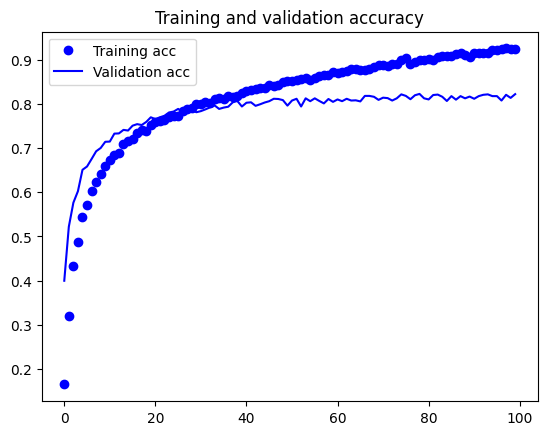

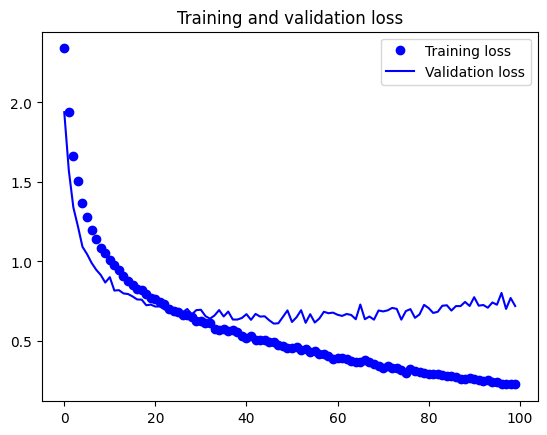

In [56]:
# Plot the Training and Validation Accuracy & Loss Scores
acc_2D = history_2D.history['accuracy']
val_acc_2D = history_2D.history['val_accuracy']
loss_2D = history_2D.history['loss']
val_loss_2D = history_2D.history['val_loss']

epochs_2D = range(len(acc_2D))

plt.plot(epochs_2D, acc_2D, 'bo', label='Training acc')
plt.plot(epochs_2D, val_acc_2D, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_2D, loss_2D, 'bo', label='Training loss')
plt.plot(epochs_2D, val_loss_2D, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [57]:
# Save the Model
model_2D.save('/content/drive/My Drive/NP DL/ASG1/food_model_2D.h5')

# from google.colab import files
# files.download('food_model_2D.h5')

### Model #2E - with L2 Weight Regularization (with Fine Tuning, Dropout Layer, Data Augmentation and Reduced Learning Rate)

In [ ]:
# Build the Model
# img_size = 150

conv_base_2E = VGG16(weights='imagenet',  # already pre-trained with 1000 classes with 1.4M images sample
                  include_top=False,  # exclude classifier portion
                  input_shape=(img_size, img_size, 3))

model_2E = models.Sequential()
model_2E.add(conv_base_2E)
model_2E.add(layers.Flatten())  # with this flatten layer, we dont have to do reshaping
model_2E.add(layers.Dense(256, activation='relu'))
model_2E.add(layers.Dropout(0.5))  # added dropout layer
model_2E.add(layers.Dense(10, activation='softmax'))

In [ ]:
conv_base_2E.trainable = True  # unfreeze for all blocks, everything trainable

def print_layer_trainable():
    for layer in conv_base_2E.layers:
        print("{0}:\t{1}".format(layer.trainable, layer.name))

set_trainable = False
for layer in conv_base_2E.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True # after block5_conv1, set_trainable becomes True
    if set_trainable:
        layer.trainable = True  # unfreeze everything after the 1st layer in black5_conv1
    else:
        layer.trainable = False
             
model_2E.summary()
print_layer_trainable()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
Total params: 16,814,666
Trainable params: 9,179,402
Non-trainable params: 7,635,264
_________________________________________________________________
False:	input_3
False:	block1_conv1


In [ ]:
# function to add regularizer to model
import tempfile

def add_regularization(model, regularizer):

    if not isinstance(regularizer, regularizers.Regularizer):
      print("Regularizer must be a subclass of tf.keras.regularizers.Regularizer")
      return model

    for layer in model.layers:
        for attr in ['kernel_regularizer']:
            if hasattr(layer, attr):
              setattr(layer, attr, regularizer)

    # When we change the layers attributes, the change only happens in the model config file
    model_json = model.to_json()

    # Save the weights before reloading the model.
    tmp_weights_path = os.path.join(tempfile.gettempdir(), '/content/drive/My Drive/NP DL/ASG1/tmp_weights.h5')
    model.save_weights(tmp_weights_path)

    # load the model from the config
    model = models.model_from_json(model_json)
    
    # Reload the model weights
    model.load_weights(tmp_weights_path, by_name=True)
    return model

# Add L2 weight regularizer to our model
model_2E = add_regularization(model_2E, regularizers.l2(1e-5))

model_2E.summary()
print_layer_trainable()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
Total params: 16,814,666
Trainable params: 9,179,402
Non-trainable params: 7,635,264
_________________________________________________________________
False:	input_3
False:	block1_conv1


In [ ]:
# compile the model
model_2E.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
# data preprocessing

# data augmentation
train_datagen_da_2 = ImageDataGenerator(
        rescale=1./255,  # rescale pixel values (0 and 255) to [0, 1] interval
        rotation_range=40,  # degrees
        width_shift_range=0.2,  # fraction of width to translate horizontally
        height_shift_range=0.2,  # fraction of height to translate vertically
        shear_range=0.2,  # shear angle in ccw direction
        zoom_range=0.2, # float
        horizontal_flip=True,
        fill_mode='nearest')  # strategy used for filling newly created pixels after transformation

# Note that the validation data should not be augmented!
test_datagen_da_2 = ImageDataGenerator(rescale=1./255)

train_generator_da_2 = train_datagen_da_2.flow_from_directory(
        # target directory
        train_dir,
        # images target size
        target_size=(img_size, img_size),
        batch_size=75,
        # type of label arrays
        class_mode='categorical')

validation_generator_da_2 = test_datagen_da_2.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=40,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [ ]:
# Train the Model
# fit the model
history_2E = model_2E.fit(train_generator_da_2,
                          steps_per_epoch=100,  #train_sample_size/data_batch_size
                          epochs=100,
                          validation_data=validation_generator_da_2,
                          validation_steps=50)  #validation_sample_size/data_batch_size

Epoch 1/100
100/100 [==============================] - 118s 1s/step - loss: 2.3222 - accuracy: 0.1700 - val_loss: 1.8983 - val_accuracy: 0.4060
Epoch 2/100
100/100 [==============================] - 115s 1s/step - loss: 1.9357 - accuracy: 0.3220 - val_loss: 1.5619 - val_accuracy: 0.5120
Epoch 3/100
100/100 [==============================] - 116s 1s/step - loss: 1.6725 - accuracy: 0.4347 - val_loss: 1.3413 - val_accuracy: 0.5710
Epoch 4/100
100/100 [==============================] - 122s 1s/step - loss: 1.5019 - accuracy: 0.4932 - val_loss: 1.2108 - val_accuracy: 0.6085
Epoch 5/100
100/100 [==============================] - 116s 1s/step - loss: 1.3810 - accuracy: 0.5408 - val_loss: 1.1206 - val_accuracy: 0.6300
Epoch 6/100
100/100 [==============================] - 117s 1s/step - loss: 1.2957 - accuracy: 0.5687 - val_loss: 1.0469 - val_accuracy: 0.6665
Epoch 7/100
100/100 [==============================] - 117s 1s/step - loss: 1.2238 - accuracy: 0.5957 - val_loss: 1.0044 - val_accuracy:

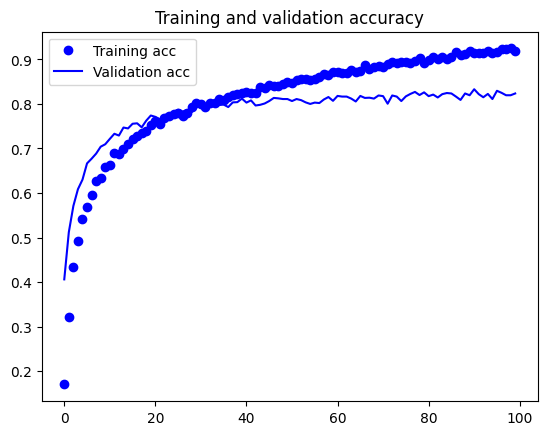

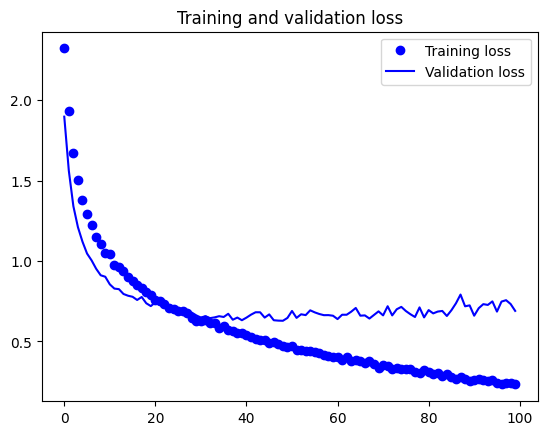

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc_2E = history_2E.history['accuracy']
val_acc_2E = history_2E.history['val_accuracy']
loss_2E = history_2E.history['loss']
val_loss_2E = history_2E.history['val_loss']

epochs_2E = range(len(acc_2E))

plt.plot(epochs_2E, acc_2E, 'bo', label='Training acc')
plt.plot(epochs_2E, val_acc_2E, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_2E, loss_2E, 'bo', label='Training loss')
plt.plot(epochs_2E, val_loss_2E, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model_2E.save('/content/drive/My Drive/NP DL/ASG1/food_model_2E.h5')

# from google.colab import files
# files.download('food_model_2E.h5')

## Step 3 – Evaluate the Developed Models using Testing Images

In [24]:
# Model #1A
model_1A = keras.models.load_model('/content/drive/My Drive/NP DL/ASG1/food_model_1A.h5')

# test_datagen = ImageDataGenerator(rescale=1./255)

test_generator_1A = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

test_loss_1A, test_acc_1A = model_1A.evaluate(test_generator_1A, steps=25)
print('test acc:', test_acc_1A)

Found 500 images belonging to 10 classes.
25/25 [==============================] - 303s 13s/step - loss: 2.5115 - accuracy: 0.2060
test acc: 0.20600000023841858


In [25]:
# Model #1B
model_1B = keras.models.load_model('/content/drive/My Drive/NP DL/ASG1/food_model_1B.h5')

# test_datagen = ImageDataGenerator(rescale=1./255)

test_generator_1B = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

test_loss_1B, test_acc_1B = model_1B.evaluate(test_generator_1B, steps=25)
print('test acc:', test_acc_1B)

Found 500 images belonging to 10 classes.
25/25 [==============================] - 4s 143ms/step - loss: 6.8066 - accuracy: 0.4480
test acc: 0.4480000138282776


In [26]:
# Model #1C
model_1C = keras.models.load_model('/content/drive/My Drive/NP DL/ASG1/food_model_1C.h5')

# test_datagen = ImageDataGenerator(rescale=1./255)

test_generator_1C = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

test_loss_1C, test_acc_1C = model_1C.evaluate(test_generator_1C, steps=25)
print('test acc:', test_acc_1C)

Found 500 images belonging to 10 classes.
25/25 [==============================] - 4s 137ms/step - loss: 3.6465 - accuracy: 0.4580
test acc: 0.4580000042915344


In [27]:
# Model #1C_2
model_1C_2 = keras.models.load_model('/content/drive/My Drive/NP DL/ASG1/food_model_1C_2.h5')

# test_datagen = ImageDataGenerator(rescale=1./255)

test_generator_1C_2 = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

test_loss_1C_2, test_acc_1C_2 = model_1C_2.evaluate(test_generator_1C_2, steps=25)
print('test acc:', test_acc_1C_2)

Found 500 images belonging to 10 classes.
25/25 [==============================] - 4s 158ms/step - loss: 4.4162 - accuracy: 0.4060
test acc: 0.4059999883174896


In [28]:
# Model #1D
model_1D = keras.models.load_model('/content/drive/My Drive/NP DL/ASG1/food_model_1D.h5')

# test_datagen = ImageDataGenerator(rescale=1./255)

test_generator_1D = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

test_loss_1D, test_acc_1D = model_1D.evaluate(test_generator_1D, steps=25)
print('test acc:', test_acc_1D)

Found 500 images belonging to 10 classes.
25/25 [==============================] - 4s 134ms/step - loss: 2.1255 - accuracy: 0.5860
test acc: 0.5860000252723694


In [29]:
# Model #1D_2
model_1D_2 = keras.models.load_model('/content/drive/My Drive/NP DL/ASG1/food_model_1D_2.h5')

# test_datagen = ImageDataGenerator(rescale=1./255)

test_generator_1D_2 = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

test_loss_1D_2, test_acc_1D_2 = model_1D_2.evaluate(test_generator_1D_2, steps=25)
print('test acc:', test_acc_1D_2)

Found 500 images belonging to 10 classes.
25/25 [==============================] - 4s 136ms/step - loss: 2.4317 - accuracy: 0.3020
test acc: 0.3019999861717224


In [30]:
# Model #1E
model_1E = keras.models.load_model('/content/drive/My Drive/NP DL/ASG1/food_model_1E.h5')

# test_datagen = ImageDataGenerator(rescale=1./255)

test_generator_1E = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

test_loss_1E, test_acc_1E = model_1E.evaluate(test_generator_1E, steps=25)
print('test acc:', test_acc_1E)

Found 500 images belonging to 10 classes.
25/25 [==============================] - 4s 155ms/step - loss: 2.8821 - accuracy: 0.5280
test acc: 0.527999997138977


In [31]:
# Model #1F
model_1F = keras.models.load_model('/content/drive/My Drive/NP DL/ASG1/food_model_1F.h5')

# test_datagen = ImageDataGenerator(rescale=1./255)

test_generator_1F = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

test_loss_1F, test_acc_1F = model_1F.evaluate(test_generator_1F, steps=25)
print('test acc:', test_acc_1F)

Found 500 images belonging to 10 classes.
25/25 [==============================] - 4s 145ms/step - loss: 1.0352 - accuracy: 0.7240
test acc: 0.7239999771118164


In [38]:
# Model #2A
model_2A = keras.models.load_model('/content/drive/My Drive/NP DL/ASG1/food_model_2A.h5')

# test_features, test_labels = extract_features(test_dir, 500)  # from above
# test_features = np.reshape(test_features, (500, 4 * 4 * 512))  # from above

test_loss_2A, test_acc_2A = model_2A.evaluate(test_features, test_labels, batch_size=20)  # steps=25  # instead of the usual test_generator
print('test acc:', test_acc_2A)

25/25 [==============================] - 0s 2ms/step - loss: 0.9118 - accuracy: 0.7060
test acc: 0.7059999704360962


In [39]:
# Model #2B
model_2B = keras.models.load_model('/content/drive/My Drive/NP DL/ASG1/food_model_2B.h5')

# test_datagen = ImageDataGenerator(rescale=1./255)

test_generator_2B = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

test_loss_2B, test_acc_2B = model_2B.evaluate(test_generator_2B, steps=25)
print('test acc:', test_acc_2B)

Found 500 images belonging to 10 classes.
25/25 [==============================] - 4s 151ms/step - loss: 0.8391 - accuracy: 0.7060
test acc: 0.7059999704360962


In [40]:
# Model #2C
model_2C = keras.models.load_model('/content/drive/My Drive/NP DL/ASG1/food_model_2C.h5')

# test_datagen = ImageDataGenerator(rescale=1./255)

test_generator_2C = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

test_loss_2C, test_acc_2C = model_2C.evaluate(test_generator_2C, steps=25)
print('test acc:', test_acc_2C)

Found 500 images belonging to 10 classes.
25/25 [==============================] - 3s 122ms/step - loss: 0.8096 - accuracy: 0.7940
test acc: 0.7940000295639038


In [41]:
# Model #2D
model_2D = keras.models.load_model('/content/drive/My Drive/NP DL/ASG1/food_model_2D.h5')

# test_datagen = ImageDataGenerator(rescale=1./255)

test_generator_2D = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

test_loss_2D, test_acc_2D = model_2D.evaluate(test_generator_2D, steps=25)
print('test acc:', test_acc_2D)

Found 500 images belonging to 10 classes.
25/25 [==============================] - 4s 125ms/step - loss: 0.7126 - accuracy: 0.8120
test acc: 0.8119999766349792


In [42]:
# Model #2E
model_2E = keras.models.load_model('/content/drive/My Drive/NP DL/ASG1/food_model_2E.h5')

# test_datagen = ImageDataGenerator(rescale=1./255)

test_generator_2E = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

test_loss_2E, test_acc_2E = model_2E.evaluate(test_generator_2E, steps=25)
print('test acc:', test_acc_2E)

Found 500 images belonging to 10 classes.
25/25 [==============================] - 3s 119ms/step - loss: 0.6746 - accuracy: 0.8120
test acc: 0.8119999766349792


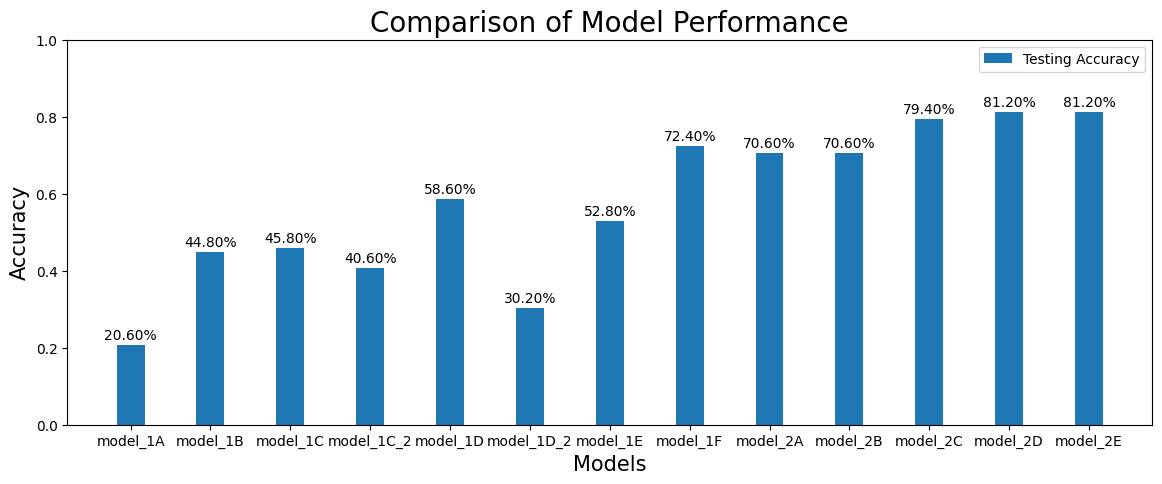

In [50]:
# define x-axis and y-axis data values
x_labels = ['model_1A', 'model_1B', 'model_1C', 'model_1C_2', 'model_1D', 'model_1D_2', 'model_1E', 'model_1F', 'model_2A', 'model_2B', 'model_2C', 'model_2D', 'model_2E']
x_axis_test = [test_acc_1A, test_acc_1B, test_acc_1C, test_acc_1C_2, test_acc_1D, test_acc_1D_2, test_acc_1E, test_acc_1F, test_acc_2A, test_acc_2B, test_acc_2C, test_acc_2D, test_acc_2E]

# set the label locations and width of the bars
x_index = np.arange(len(x_labels))  
width = 0.35

plt.figure(figsize=(14,5))

# plot side-by-side bars
bar1 = plt.bar(x_index, x_axis_test, width, label='Testing Accuracy')

# customise the plot
plt.title('Comparison of Model Performance', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 15)
plt.xlabel('Models', fontsize = 15)
plt.xticks(x_index, x_labels)
plt.ylim(bottom = 0, top = 1.0)
plt.legend()

# function to display data labels/annotations for each bar
def autolabel(bars):
    for each in bars:
        acc = each.get_height()
        plt.annotate('{:.2f}%'.format(acc*100),
                    xy=(each.get_x() + each.get_width() / 2, acc),
                    xytext=(0, 2),  # 2 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
# autolabel function to display data label for each bar       
autolabel(bar1)

In [ ]:
# Save the best model
model_2D.save('/content/drive/My Drive/NP DL/ASG1/food_model_best.h5')

## Step 4  – Use the best model to make prediction

In [ ]:
# Load the model
model = keras.models.load_model('/content/drive/My Drive/NP DL/ASG1/food_model_best.h5')

In [ ]:
# Load the food list (in alphabetical order)
with open('/content/drive/My Drive/NP DL/ASG1/food_list.txt', 'r') as f:
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

['baby_back_ribs', 'bibimbap', 'cup_cakes', 'dumplings', 'fried_calamari', 'garlic_bread', 'lasagna', 'pancakes', 'prime_rib', 'tiramisu']


In [ ]:
# Define some related functions for image process and model prediction
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))  # convert to PIL format
    image_array = img_to_array(image)/255  # convert to numpy array and rescale to [0,1]
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))  # reshape into consistent size  # generates output predictions for the input samples
    pro_df = pd.DataFrame(prob, columns = items_l)  # set probabilities of prediction into dataframe with food_list as column names
    result = items_l[np.argmax(prob)]  # argmax: returns the indices of the maximum values along an axis  # returns food label from list
    return pro_df, result

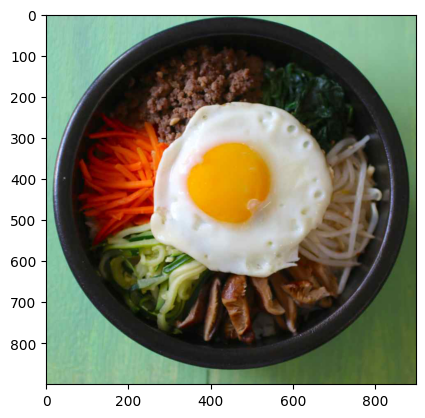

1/1 [==============================] - 1s 825ms/step
The prediction is:  bibimbap 

    baby_back_ribs  bibimbap     cup_cakes     dumplings  fried_calamari  \
0    6.801139e-14       1.0  3.932538e-16  2.712961e-12    7.979138e-14   

   garlic_bread       lasagna      pancakes     prime_rib      tiramisu  
0  7.453599e-16  1.641752e-14  2.995227e-13  8.015996e-17  9.951029e-15  


In [ ]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = '/content/drive/My Drive/NP DL/ASG1/bibimbap.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))  # read image from a file into an array  # display data as an image
plt.show()

img_array = image_process(img)  # user-defined function
prob_df, result = prediction(model, img_array, food_list)  # user-defined function
print('The prediction is: ', result, '\n\n', prob_df)

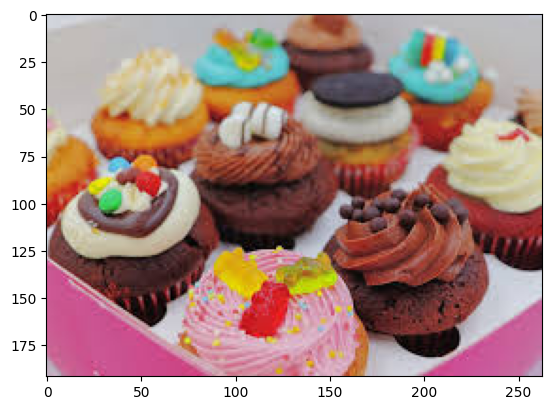

1/1 [==============================] - 0s 45ms/step
The prediction is:  cup_cakes 

    baby_back_ribs      bibimbap  cup_cakes     dumplings  fried_calamari  \
0    4.961916e-14  6.683479e-16        1.0  3.325166e-14    1.180574e-15   

   garlic_bread       lasagna      pancakes     prime_rib      tiramisu  
0  1.656197e-16  9.504291e-15  7.058508e-14  1.328055e-13  2.602538e-12  


In [ ]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = '/content/drive/My Drive/NP DL/ASG1/cupcake.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

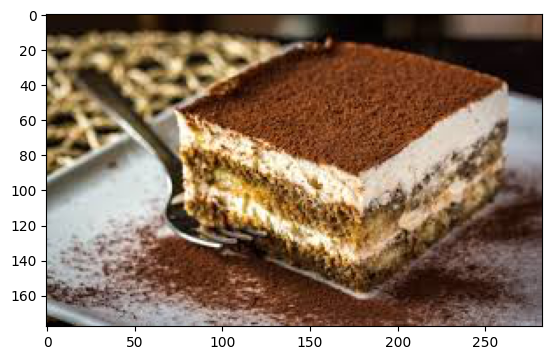

1/1 [==============================] - 0s 36ms/step
The prediction is:  tiramisu 

    baby_back_ribs      bibimbap     cup_cakes     dumplings  fried_calamari  \
0    2.184016e-13  7.750310e-16  3.553511e-12  3.642837e-15    1.034025e-14   

   garlic_bread       lasagna      pancakes     prime_rib  tiramisu  
0  2.763647e-13  1.239966e-11  3.667415e-13  4.644287e-13       1.0  


In [ ]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = '/content/drive/My Drive/NP DL/ASG1/tiramisu.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)